In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import keras as kr
import random 
import preprocessor
import base_preprocessor
import operator
import lightgbm as lgb
import statsmodels.api as sm
import catboost as cb
import xgboost as xgb
from preprocessor import prepare_data, get_features, get_bounds, get_interval_accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, Lasso
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from lightgbm import LGBMRegressor
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from catboost import CatBoostRegressor, Pool

# Load in pre-split data for original data
X_train, X_test, y_train, y_test = base_preprocessor.prepare_data()
features = base_preprocessor.get_features()

train_bounds_5 = get_bounds(y_train, 5)
train_bounds_10 = get_bounds(y_train, 10)
test_bounds_5 = get_bounds(y_test, 5)
test_bounds_10 = get_bounds(y_test, 10)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
Using TensorFlow backend.
/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed,

Train data(range):
2019-04-11 21:50:04
2019-08-22 19:06:11
Test data(range):
2019-04-11 21:50:04
2019-08-22 19:05:42


### Linear Regression

In [ ]:
# Linear Regression model (without regularization)
lm = LinearRegression()
lm.fit(X_train, y_train)

# Compute predictions
y_pred_train_lm = lm.predict(X_train)
y_pred_test_lm = lm.predict(X_test)

# Compute metrics
MSE = mean_squared_error(y_train, y_pred_train_lm)
r2 = r2_score(y_train, y_pred_train_lm)

print("Train Scores:")
print(MSE)
print(r2)

MSE = mean_squared_error(y_test, y_pred_test_lm)
r2 = r2_score(y_test, y_pred_test_lm)

print("Test Scores:")
print(MSE)
print(r2)

coef_df = pd.DataFrame(lm.coef_[0], features, columns=['Coefficient'])
coef_df

In [ ]:
print(np.mean(get_interval_accuracy_score(train_bounds_5, y_pred_train_lm)))
print(np.mean(get_interval_accuracy_score(test_bounds_5, y_pred_test_lm)))

#### Ridge Regression

In [ ]:
# Linear Regression model (with Ridge Regression)
rr = Ridge(alpha=0.06)
rr.fit(X_train, y_train)

# Compute predictions
y_pred_train_rr = rr.predict(X_train)
y_pred_test_rr = rr.predict(X_test)

# Compute metrics
MSE = mean_squared_error(y_train, y_pred_train_rr)
r2 = r2_score(y_train, y_pred_train_rr)

print("Train Scores:")
print(MSE)
print(r2)

MSE = mean_squared_error(y_test, y_pred_test_rr)
r2 = r2_score(y_test, y_pred_test_rr)

print("Test Scores:")
print(MSE)
print(r2)

coef_df = pd.DataFrame(rr.coef_[0], features, columns=['Coefficient'])
coef_df

In [ ]:
print(np.mean(get_interval_accuracy_score(train_bounds_5, y_pred_train_rr)))
print(np.mean(get_interval_accuracy_score(test_bounds_5, y_pred_test_rr)))

#### Lasso Linear Regression

In [ ]:
# Linear Regression model (with Lasso)
lso = Lasso(alpha=0.1, tol=0.001)
lso.fit(X_train, y_train)

# Compute predictions
y_pred_train_lso = lso.predict(X_train)
y_pred_test_lso = lso.predict(X_test)

# Compute metrics
MSE = mean_squared_error(y_train, y_pred_train_lso)
r2 = r2_score(y_train, y_pred_train_lso)

print("Train Scores:")
print(MSE)
print(r2)

MSE = mean_squared_error(y_test, y_pred_test_lso)
r2 = r2_score(y_test, y_pred_test_lso)

print("Test Scores:")
print(MSE)
print(r2)

coef_df = pd.DataFrame(lso.coef_, features, columns=['Coefficient'])
coef_df

In [ ]:
print(np.mean(get_interval_accuracy_score(train_bounds_5, y_pred_train_lso)))
print(np.mean(get_interval_accuracy_score(test_bounds_5, y_pred_test_lso)))

### Gradient Boosting

#### GradientBoostingRegression

In [4]:
y_train = list(np.array(y_train).flatten())
y_test = list(np.array(y_test).flatten())

In [5]:
model = GradientBoostingRegressor(n_estimators=500, max_depth=8, loss='ls', min_samples_split=2, learning_rate=0.01)

In [6]:
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(mean_squared_error(y_test, model.predict(X_test)))

0.9205264423575018
51.197738279029025


Text(0.5, 1.0, 'Gradient Boost Actual vs. Predicted Values')

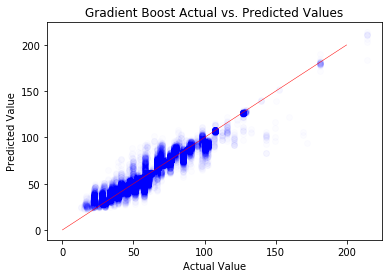

In [7]:
y_preds_train_gb = model.predict(X_train)
y_preds_test_gb = model.predict(X_test)
plt.plot(y_test, y_preds_test_gb, 'bo', alpha = 0.01)
plt.plot([0, 200], [0, 200], color = 'red', linewidth = 0.5)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Gradient Boost Actual vs. Predicted Values")

In [24]:
print(np.mean(get_interval_accuracy_score(test_bounds_5, y_preds_test_gb)))
print(np.mean(get_interval_accuracy_score(test_bounds_10, y_preds_test_gb)))

0.5008
0.68345


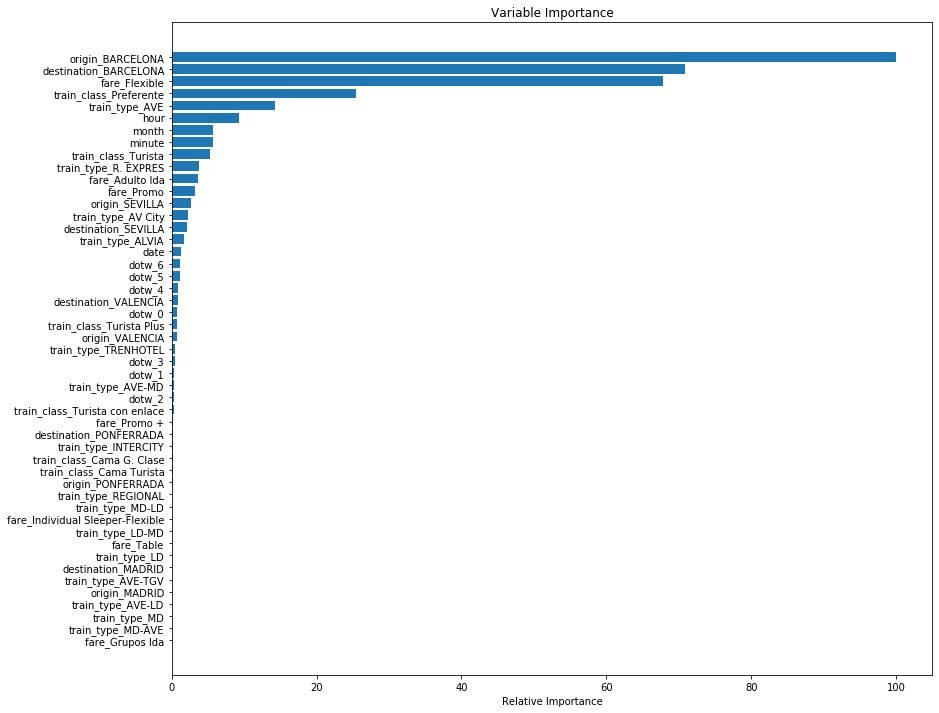

In [10]:
indices = np.array(list(range(len(features))))
features = np.array(features)[indices.astype(int)]
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(30, 12))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, features[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#### XGBoost

In [20]:
bst = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=1, gamma=0,
             importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, silent=None, subsample=1,
             verbosity=1)

In [21]:
bst.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=0, silent=None, subsample=1, verbosity=1)

In [22]:
y_preds_bst = bst.predict(X_test)
print(r2_score(y_test, y_preds_bst))
print(mean_squared_error(y_test, y_preds_bst))
print(get_interval_accuracy_score(test_bounds_5, y_preds_bst))
print(get_interval_accuracy_score(test_bounds_10, y_preds_bst))

0.937998082926924
39.942315623831185
0.5648
0.753


#### CatBoost

In [11]:
cbe = cb.CatBoostRegressor(iterations=1000, learning_rate=0.2, depth=10, l2_leaf_reg=1)

In [12]:
cbe.fit(X_train, y_train)
cbe_y_preds_test = cbe.predict(X_test)

0:	learn: 21.3088029	total: 76.7ms	remaining: 1m 16s
1:	learn: 17.9908623	total: 87.9ms	remaining: 43.9s
2:	learn: 15.4902106	total: 97.1ms	remaining: 32.3s
3:	learn: 13.6130578	total: 108ms	remaining: 26.8s
4:	learn: 12.1754658	total: 117ms	remaining: 23.2s
5:	learn: 11.1419668	total: 127ms	remaining: 21s
6:	learn: 10.3397482	total: 136ms	remaining: 19.3s
7:	learn: 9.7942295	total: 147ms	remaining: 18.2s
8:	learn: 9.3830839	total: 157ms	remaining: 17.3s
9:	learn: 9.0283485	total: 167ms	remaining: 16.5s
10:	learn: 8.7523911	total: 180ms	remaining: 16.2s
11:	learn: 8.5655349	total: 190ms	remaining: 15.7s
12:	learn: 8.4073413	total: 201ms	remaining: 15.3s
13:	learn: 8.3019479	total: 215ms	remaining: 15.2s
14:	learn: 8.1901825	total: 227ms	remaining: 14.9s
15:	learn: 8.0902887	total: 240ms	remaining: 14.8s
16:	learn: 8.0089161	total: 252ms	remaining: 14.6s
17:	learn: 7.9326368	total: 264ms	remaining: 14.4s
18:	learn: 7.8716646	total: 275ms	remaining: 14.2s
19:	learn: 7.8438135	total: 287m

168:	learn: 5.6221562	total: 2.36s	remaining: 11.6s
169:	learn: 5.6186179	total: 2.38s	remaining: 11.6s
170:	learn: 5.6161369	total: 2.39s	remaining: 11.6s
171:	learn: 5.6082623	total: 2.41s	remaining: 11.6s
172:	learn: 5.6012101	total: 2.42s	remaining: 11.6s
173:	learn: 5.5939743	total: 2.44s	remaining: 11.6s
174:	learn: 5.5884633	total: 2.45s	remaining: 11.6s
175:	learn: 5.5811862	total: 2.47s	remaining: 11.6s
176:	learn: 5.5763570	total: 2.48s	remaining: 11.5s
177:	learn: 5.5695673	total: 2.5s	remaining: 11.5s
178:	learn: 5.5653726	total: 2.51s	remaining: 11.5s
179:	learn: 5.5596268	total: 2.53s	remaining: 11.5s
180:	learn: 5.5517241	total: 2.54s	remaining: 11.5s
181:	learn: 5.5434963	total: 2.56s	remaining: 11.5s
182:	learn: 5.5373706	total: 2.57s	remaining: 11.5s
183:	learn: 5.5311218	total: 2.59s	remaining: 11.5s
184:	learn: 5.5221319	total: 2.6s	remaining: 11.5s
185:	learn: 5.5155190	total: 2.62s	remaining: 11.5s
186:	learn: 5.5110572	total: 2.63s	remaining: 11.4s
187:	learn: 5.

336:	learn: 4.9473550	total: 4.78s	remaining: 9.41s
337:	learn: 4.9462871	total: 4.8s	remaining: 9.4s
338:	learn: 4.9439110	total: 4.81s	remaining: 9.38s
339:	learn: 4.9420050	total: 4.82s	remaining: 9.36s
340:	learn: 4.9401485	total: 4.83s	remaining: 9.34s
341:	learn: 4.9368340	total: 4.84s	remaining: 9.32s
342:	learn: 4.9341920	total: 4.86s	remaining: 9.3s
343:	learn: 4.9327013	total: 4.87s	remaining: 9.29s
344:	learn: 4.9307829	total: 4.88s	remaining: 9.26s
345:	learn: 4.9282171	total: 4.89s	remaining: 9.24s
346:	learn: 4.9243533	total: 4.9s	remaining: 9.22s
347:	learn: 4.9217087	total: 4.91s	remaining: 9.21s
348:	learn: 4.9207976	total: 4.92s	remaining: 9.18s
349:	learn: 4.9197450	total: 4.93s	remaining: 9.16s
350:	learn: 4.9174758	total: 4.94s	remaining: 9.14s
351:	learn: 4.9137314	total: 4.96s	remaining: 9.12s
352:	learn: 4.9115293	total: 4.97s	remaining: 9.1s
353:	learn: 4.9084564	total: 4.98s	remaining: 9.08s
354:	learn: 4.9073949	total: 4.99s	remaining: 9.06s
355:	learn: 4.904

498:	learn: 4.6059317	total: 6.4s	remaining: 6.43s
499:	learn: 4.6047740	total: 6.42s	remaining: 6.42s
500:	learn: 4.6022828	total: 6.43s	remaining: 6.41s
501:	learn: 4.6009485	total: 6.44s	remaining: 6.39s
502:	learn: 4.5994886	total: 6.45s	remaining: 6.37s
503:	learn: 4.5977388	total: 6.46s	remaining: 6.36s
504:	learn: 4.5939417	total: 6.47s	remaining: 6.34s
505:	learn: 4.5923478	total: 6.48s	remaining: 6.33s
506:	learn: 4.5900402	total: 6.49s	remaining: 6.31s
507:	learn: 4.5882825	total: 6.5s	remaining: 6.29s
508:	learn: 4.5870482	total: 6.51s	remaining: 6.28s
509:	learn: 4.5853763	total: 6.52s	remaining: 6.26s
510:	learn: 4.5840307	total: 6.53s	remaining: 6.25s
511:	learn: 4.5819801	total: 6.54s	remaining: 6.23s
512:	learn: 4.5802739	total: 6.54s	remaining: 6.21s
513:	learn: 4.5769091	total: 6.55s	remaining: 6.2s
514:	learn: 4.5755259	total: 6.56s	remaining: 6.18s
515:	learn: 4.5745188	total: 6.57s	remaining: 6.17s
516:	learn: 4.5737966	total: 6.58s	remaining: 6.15s
517:	learn: 4.5

664:	learn: 4.3776838	total: 8.02s	remaining: 4.04s
665:	learn: 4.3767500	total: 8.03s	remaining: 4.03s
666:	learn: 4.3750315	total: 8.04s	remaining: 4.01s
667:	learn: 4.3738494	total: 8.05s	remaining: 4s
668:	learn: 4.3727346	total: 8.06s	remaining: 3.99s
669:	learn: 4.3721637	total: 8.07s	remaining: 3.98s
670:	learn: 4.3705497	total: 8.08s	remaining: 3.96s
671:	learn: 4.3694302	total: 8.09s	remaining: 3.95s
672:	learn: 4.3676156	total: 8.1s	remaining: 3.93s
673:	learn: 4.3666976	total: 8.11s	remaining: 3.92s
674:	learn: 4.3656508	total: 8.12s	remaining: 3.91s
675:	learn: 4.3637574	total: 8.13s	remaining: 3.89s
676:	learn: 4.3629034	total: 8.13s	remaining: 3.88s
677:	learn: 4.3598906	total: 8.14s	remaining: 3.87s
678:	learn: 4.3593432	total: 8.15s	remaining: 3.85s
679:	learn: 4.3580311	total: 8.16s	remaining: 3.84s
680:	learn: 4.3564032	total: 8.17s	remaining: 3.83s
681:	learn: 4.3551799	total: 8.18s	remaining: 3.81s
682:	learn: 4.3526943	total: 8.19s	remaining: 3.8s
683:	learn: 4.351

836:	learn: 4.2082254	total: 9.63s	remaining: 1.88s
837:	learn: 4.2073900	total: 9.65s	remaining: 1.86s
838:	learn: 4.2056502	total: 9.66s	remaining: 1.85s
839:	learn: 4.2046751	total: 9.67s	remaining: 1.84s
840:	learn: 4.2043622	total: 9.68s	remaining: 1.83s
841:	learn: 4.2041612	total: 9.69s	remaining: 1.82s
842:	learn: 4.2036016	total: 9.69s	remaining: 1.8s
843:	learn: 4.2022909	total: 9.7s	remaining: 1.79s
844:	learn: 4.2017279	total: 9.71s	remaining: 1.78s
845:	learn: 4.2007399	total: 9.72s	remaining: 1.77s
846:	learn: 4.1997707	total: 9.73s	remaining: 1.76s
847:	learn: 4.1990205	total: 9.74s	remaining: 1.75s
848:	learn: 4.1980277	total: 9.75s	remaining: 1.73s
849:	learn: 4.1973139	total: 9.76s	remaining: 1.72s
850:	learn: 4.1967511	total: 9.76s	remaining: 1.71s
851:	learn: 4.1952647	total: 9.77s	remaining: 1.7s
852:	learn: 4.1943033	total: 9.78s	remaining: 1.69s
853:	learn: 4.1940679	total: 9.79s	remaining: 1.67s
854:	learn: 4.1934391	total: 9.8s	remaining: 1.66s
855:	learn: 4.19

In [13]:
print(r2_score(y_test, cbe_y_preds_test))
print(mean_squared_error(y_test, cbe_y_preds_test))
print(get_interval_accuracy_score(test_bounds_5, cbe_y_preds_test))
print(get_interval_accuracy_score(test_bounds_10, cbe_y_preds_test))

0.9489989635780184
32.85542754280252
0.65115
0.8126


### Neural Networks

In [14]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

def base_model():
    model = Sequential()
    model.add(Dense(10, input_dim = 49, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))
    adam = Adam()
    # Compile
    model.compile(loss = 'mean_squared_error', optimizer=adam, metrics =['mean_squared_error'])
    return model

def run_network(xtrain, xtest, ytrain, ytest, model, epochs, batch):
    model.fit(xtrain, ytrain, nb_epoch = epochs, batch_size = batch,
              validation_data = (xtest, ytest),verbose = 2)
    return model

# Change the number of layers but hold the number of hidden neurons constant
def change_layers_neurons(numlayers, numneurons):
    model = Sequential()
    model.add(Dense(numneurons, input_dim = 49, kernel_initializer = 'normal', activation = 'relu'))
    for x in range(1- numlayers):
        model.add(Dense(numneurons, kernel_initializer = 'normal', activation = 'relu'))
#        if x in (3, 7, 11):
#            model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))
    adam = Adam()
    model.compile(loss = 'mean_squared_error', optimizer=adam, metrics =['mean_squared_error'])
    return model
#
#def changenumneurons(numneurons):
#    model = Sequential()
#    model.add(Dense(numneurons, input_dim = 57, kernel_initializer = 'normal', activation = 'relu'))
#    model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))
#    adam = Adam()
#    model.compile(loss = 'mean_squared_error', optimizer=adam, metrics =['mean_squared_error'])
#    return model

basemodel = base_model()
basemodel.summary()

# Run Network for Base Model
run_network(X_train, X_test, y_train, y_test, basemodel, 10,20)
# loss: 71.4160 - mean_squared_error: 71.4160 - val_loss: 87.4430 - val_mean_squared_error: 87.4430


# Create more networks hold number of neurons/layer constant
 
# 5 layers

model1 = change_layers_neurons(5, 10)
run_network(X_train, X_test, y_train, y_test, model1, 10,20)
run_network(X_train, X_test, y_train, y_test, model1, 10,3)
#  loss: 90.4071 - mean_squared_error: 90.4070 - val_loss: 103.8374 - val_mean_squared_error: 103.8374
#loss: 76.7292 - mean_squared_error: 76.7292 - val_loss: 91.1591 - val_mean_squared_error: 91.1588

# 10 layers
model2 = change_layers_neurons(10, 10)
run_network(X_train, X_test, y_train, y_test, model2, 10,20)
# loss: 86.6922 - mean_squared_error: 86.6923 - val_loss: 96.1824 - val_mean_squared_error: 96.1825


# 15 layers

model3 = change_layers_neurons(15, 10)
run_network(X_train, X_test, y_train, y_test, model3, 10,20)
# loss: 86.0480 - mean_squared_error: 86.0479 - val_loss: 90.0093 - val_mean_squared_error: 90.0093

# 25 layers

model4 = change_layers_neurons(25, 10)
run_network(X_train, X_test, y_train, y_test, model3, 10,20)
# loss: 82.1912 - mean_squared_error: 82.1912 - val_loss: 95.2062 - val_mean_squared_error: 95.2062

# Create layers with more neurons, hold number of layers constant

# 15 neurons
model5 = change_layers_neurons(3, 15)
run_network(X_train, X_test, y_train, y_test, model5, 10,20)

# 20 neurons
model6 = change_layers_neurons(3, 20)
run_network(X_train, X_test, y_train, y_test, model6, 10,20)

# 30 neurons
model7 = change_layers_neurons(3, 30)
run_network(X_train, X_test, y_train, y_test, model7, 10,20)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                500       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


/Users/hannahstoik/PycharmProjects/smlproject/venv/lib/python/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 80000 samples, validate on 20000 samples
Epoch 1/10
 - 3s - loss: 702.6641 - mean_squared_error: 702.6644 - val_loss: 127.2365 - val_mean_squared_error: 127.2364
Epoch 2/10
 - 3s - loss: 114.6024 - mean_squared_error: 114.6025 - val_loss: 111.9765 - val_mean_squared_error: 111.9765
Epoch 3/10
 - 3s - loss: 107.5466 - mean_squared_error: 107.5468 - val_loss: 106.2176 - val_mean_squared_error: 106.2176
Epoch 4/10
 - 3s - loss: 102.9476 - mean_squared_error: 102.9478 - val_loss: 103.6839 - val_mean_squared_error: 103.6839
Epoch 5/10
 - 3s - loss: 100.7027 - mean_squared_error: 100.7026 - val_loss: 102.2335 - val_mean_squared_error: 102.2335
Epoch 6/10
 - 3s - loss: 99.4817 - mean_squared_error: 99.4817 - val_loss: 101.4734 - val_mean_squared_error: 101.4734
Epoch 7/10
 - 3s - loss: 98.7780 - mean_squared_error: 98.7779 - val_loss: 101.0401 - val_mean_squared_error: 101.0401
Epoch 8/10
 - 3s - loss: 98.2353 - mean_squared_error: 98.2351 - val_loss: 100.6834 - val_mean_squared_erro

Epoch 6/10
 - 3s - loss: 102.3108 - mean_squared_error: 102.3107 - val_loss: 104.4131 - val_mean_squared_error: 104.4132
Epoch 7/10
 - 3s - loss: 101.8341 - mean_squared_error: 101.8342 - val_loss: 104.0168 - val_mean_squared_error: 104.0169
Epoch 8/10
 - 3s - loss: 101.2139 - mean_squared_error: 101.2139 - val_loss: 103.2411 - val_mean_squared_error: 103.2412
Epoch 9/10
 - 3s - loss: 100.4559 - mean_squared_error: 100.4559 - val_loss: 102.5534 - val_mean_squared_error: 102.5534
Epoch 10/10
 - 3s - loss: 99.9853 - mean_squared_error: 99.9854 - val_loss: 102.5034 - val_mean_squared_error: 102.5033
Train on 80000 samples, validate on 20000 samples
Epoch 1/10
 - 3s - loss: 480.4950 - mean_squared_error: 480.4952 - val_loss: 112.8973 - val_mean_squared_error: 112.8973
Epoch 2/10
 - 3s - loss: 107.3665 - mean_squared_error: 107.3665 - val_loss: 106.0903 - val_mean_squared_error: 106.0904
Epoch 3/10
 - 3s - loss: 102.6114 - mean_squared_error: 102.6113 - val_loss: 103.5379 - val_mean_squared

In [15]:
# Compute predictions
y_pred_train_nn = model7.predict(X_train)
y_pred_test_nn = model7.predict(X_test)

In [23]:
print(np.mean(get_interval_accuracy_score(test_bounds_5, y_pred_test_nn)))
print(np.mean(get_interval_accuracy_score(test_bounds_10, y_pred_test_nn)))

0.37595
0.5748


In [17]:
print(r2_score(y_test, y_pred_test_nn))
print(mean_squared_error(y_test, y_pred_test_nn))

0.850703946532931
96.1781565874122
